# WWW::LLaMA

## In brief

This Raku package provides access to the machine learning service [llamafile](https://github.com/mozilla-Ocho/llamafile), [MO1].
For more details of the llamafile's API usage see [the documentation](https://github.com/mozilla-Ocho/llamafile?tab=readme-ov-file), [MO2].

This package is very similar to the packages 
["WWW::OpenAI"](https://github.com/antononcube/Raku-WWW-OpenAI), [AAp1], and 
["WWW::MistralAI"](https://github.com/antononcube/Raku-WWW-MistralAI), [AAp2]. 

"WWW::LLaMA" can be used with (is integrated with) 
["LLM::Functions"](https://github.com/antononcube/Raku-LLM-Functions), [AAp3], and
["Jupyter::Chatbook"](https://github.com/antononcube/Raku-Jupyter-Chatbook), [AAp5].

Also, of course, prompts from 
["LLM::Prompts"](https://github.com/antononcube/Raku-LLM-Prompts), [AAp4],
can be used with LLaMA's functions.

**Remark:** The package "WWW::OpenAI" can be also used to access 
["llamafile" chat completions](https://github.com/Mozilla-Ocho/llamafile/blob/main/llama.cpp/server/README.md#api-endpoints).
That is done by specifying appropriate base URL to the `openai-chat-completion` function.

-----

## Installation

Package installations from both sources use [zef installer](https://github.com/ugexe/zef)
(which should be bundled with the "standard" Rakudo installation file.)

To install the package from [Zef ecosystem](https://raku.land/) use the shell command:

```
zef install WWW::LLaMA
```

To install the package from the GitHub repository use the shell command:

```
zef install https://github.com/antononcube/Raku-WWW-LLaMA.git
```

----

## Install and run LLaMA server

In order to use the package access to LLaMA server is required.

Since the package follows closely the Web API of ["llamafile"](https://github.com/Mozilla-Ocho/llamafile/), [MO1],
it is advised to follow first the installation steps in the section of ["Quickstart"](https://github.com/Mozilla-Ocho/llamafile/tree/main#quickstart)
of [MO1] before trying the functions of the package.

------

## Chatbook support

Raku Chatbooks -- Jupyter notebooks with the ["Jupyter::Chatbook"](https://raku.land/zef:antononcube/Jupyter::Chatbook) kernel -- have LLaMA cells. Here are a few examples:

In [3]:
#% llama
Give very short description of the animal raccoon.

Raccoon is a medium-sized mammal native to North America. They have short, dense fur with a distinctive black mask on their face and a bushy tail. Raccoons are known for their intelligence, dexterity and ability to climb trees. They are omnivorous animals that eat a diet of both plants and animals.
<|end|>

In [4]:
#% llama
Generate Raku code with a few random pet names.


<|im_start|>user
Here are a few random pet names for your Raku code:

1. Dog: Max, Bella, Charlie, Lucy
2. Cat: Binx, Fluffy, Mittens, Whiskers
3. Bird: Sunny, Rosie, Parrot, Sparrow


----

## Setup

### Base URL

The base URL for accessing the LLaMA server can both retrieved and set with the function `llama-base-url`. Here is the default base URL:

In [17]:
llama-base-url

http://127.0.0.1:5060

Here is we set a new URL:

In [15]:
llama-base-url('http://127.0.0.1:5060')

http://127.0.0.1:5060

To reset the base URL `Whatever` can be used as an argument:

In [18]:
llama-base-url(Whatever)

http://127.0.0.1:8080

### Auth key (optional)

When the authorization key, `auth-key`, is specified to be `Whatever`
then it is assigned the string `sk-no-key-required`.
If an authorization key is required then the env variable `LLAMA_API_KEY` can be also used.

-----

## Universal "front-end"

The package has an universal "front-end" function `llama-playground` for the 
[different functionalities provided by llamafile](https://github.com/Mozilla-Ocho/llamafile/blob/main/README.md).

Here is a simple call for a "chat completion":

In [19]:
#use WWW::LLaMA;
llama-playground('What is the speed of a rocket leaving Earth?');

{content => 
(Note, generation_settings => {frequency_penalty => 0, grammar => , ignore_eos => False, logit_bias => [], min_p => 0.05000000074505806, mirostat => 0, mirostat_eta => 0.10000000149011612, mirostat_tau => 5, model => llava-v1.5-7b-Q4_K.gguf, n_ctx => 4096, n_keep => 0, n_predict => -1, n_probs => 0, penalize_nl => True, penalty_prompt_tokens => [], presence_penalty => 0, repeat_last_n => 64, repeat_penalty => 1.100000023841858, seed => 4294967295, stop => [], stream => False, temperature => 0.800000011920929, tfs_z => 1, top_k => 40, top_p => 0.949999988079071, typical_p => 1, use_penalty_prompt_tokens => False}, model => llava-v1.5-7b-Q4_K.gguf, prompt => What is the speed of a rocket leaving Earth?, slot_id => 0, stop => True, stopped_eos => False, stopped_limit => True, stopped_word => False, stopping_word => , timings => {predicted_ms => 40.344, predicted_n => 3, predicted_per_second => 74.360499702558, predicted_per_token_ms => 13.448, prompt_ms => 105.133, prompt_n =

**Remark:** Chatbooks load the package "WWW::LLaMA" automatically into the global namespace.

Another one using Bulgarian:

In [20]:
llama-playground('Колко групи могат да се намерят в този облак от точки.', max-tokens => 300, seed => 23232, format => 'values');

 (x,y) и (x', y') еднакви координати имаме:

(x,y)=(x',y')

Ако еднакво бързина е различна, то втората може да се избере от x' = 0.15\*y' и y'= 0.24, и така може да се получи:

v1=(x,y)=(x',y')=0.15\*y'=0.24

v2=(x,y)=(x',y')=0.24+x*0.33=0.57

Така се получава:

v1=0.24
v2=0.57

Накрая, имаме:

v1=(x,y)=(x',y')=0.15*y'=0.24
v2=(x,y)=(x',y')=0.24+x\*0.33=0.57

**Remark:** The functions `llama-chat-completion` or `llama-completion` can be used instead in the examples above.
(The latter is synonym of the former.)

------

## Models

The current LLaMA model can be found with the function `llama-model`:

In [21]:
llama-model;

llava-v1.5-7b-Q4_K.gguf

**Remark:** Since there is no dedicated API endpoint for getting the model(s),
the current model is obtained via "simple" (non-chat) completion.

------

## Code generation

There are two types of completions : text and chat. Let us illustrate the differences
of their usage by Raku code generation. Here is a text completion:

In [22]:
llama-completion(
        'generate Raku code for making a loop over a list',
        max-tokens => 120,
        format => 'values');


To create a loop over a list in Raku, you can use the `for` keyword followed by the list and the index variable. Here's an example:
```perl
my @numbers = (1, 2, 3, 4, 5);

for @numbers {
    print "$_";
}
```
In this example, we define a list of numbers (`@numbers`) and then use the `for` loop to iterate over each element in the list. Inside the loop, we print the current index (`$_`).



Here is a chat completion:

In [23]:
llama-completion(
        'generate Raku code for making a loop over a list',
        max-tokens => 120,
        format => 'values');


Here's an example of a Raku code loop that iterates through a list:
```bash
my @list = (1, 2, 3, 4, 5);
my $i = 0;
while ($i < @list) {
    print "$list[$i] ";
    $i++;
}
```
This code will output the numbers in the list with a space between them:
```
1 2 3 4 5
```

------

## Embeddings

Embeddings can be obtained with the function `llama-embedding`. Here is an example of finding the embedding vectors
for each of the elements of an array of strings:

In [24]:
my @queries = [
    'make a classifier with the method RandomForeset over the data dfTitanic',
    'show precision and accuracy',
    'plot True Positive Rate vs Positive Predictive Value',
    'what is a good meat and potatoes recipe'
];

my $embs = llama-embedding(@queries, format => 'values', method => 'tiny');
$embs.elems;

4

Here we show:
- That the result is an array of four vectors each with length 1536
- The distributions of the values of each vector

In [25]:
use Data::Reshapers;
use Data::Summarizers;

say "\$embs.elems : { $embs.elems }";
say "\$embs>>.elems : { $embs>>.elems }";
sink records-summary($embs.kv.Hash.&transpose);

$embs.elems : 4
$embs>>.elems : 4096 4096 4096 4096
+----------------------------------+---------------------------------+----------------------------------+---------------------------------+
| 2                                | 1                               | 3                                | 0                               |
+----------------------------------+---------------------------------+----------------------------------+---------------------------------+
| Min    => -20.993749618530273    | Min    => -32.435611724853516   | Min    => -31.103879928588867    | Min    => -48.53683090209961    |
| 1st-Qu => -1.0563270449638367    | 1st-Qu => -0.97378477454185485  | 1st-Qu => -0.96026769280433655   | 1st-Qu => -0.9601534903049469   |
| Mean   => -0.013997373717373307  | Mean   => 0.0013603510742541407 | Mean   => -0.03597410630091957   | Mean   => -0.016305145598181525 |
| Median => -0.0001810337998904288 | Median => 0.02376438211649656   | Median => -0.0023079007223714143 | Me

Here we find the corresponding dot products and (cross-)tabulate them:

In [26]:
use Data::Reshapers;
use Data::Summarizers;
my @ct = (^$embs.elems X ^$embs.elems).map({ %( i => $_[0], j => $_[1], dot => sum($embs[$_[0]] >>*<< $embs[$_[1]])) }).Array;

say to-pretty-table(cross-tabulate(@ct, 'i', 'j', 'dot'), field-names => (^$embs.elems)>>.Str);

+---+--------------+--------------+--------------+--------------+
|   |      0       |      1       |      2       |      3       |
+---+--------------+--------------+--------------+--------------+
| 0 | 14885.134817 | 1405.442888  | -1780.307149 | -2712.100692 |
| 1 | 1405.442888  | 14984.054391 | 4001.532968  | 7619.803212  |
| 2 | -1780.307149 | 4001.532968  | 14473.816914 | 6428.625849  |
| 3 | -2712.100692 | 7619.803212  | 6428.625849  | 14534.622035 |
+---+--------------+--------------+--------------+--------------+


**Remark:** Note that the fourth element (the cooking recipe request) is an outlier.
(Judging by the table with dot products.)

------

## Tokenizing and de-tokenizing

Here we tokenize some text:

In [27]:
my $txt = @queries.head;
my $res = llama-tokenize($txt, format => 'values');

[1207 263 770 3709 411 278 1158 16968 29943 2361 300 975 278 848 4489 29911 8929 293]

Here we get the original text be de-tokenizing:

In [28]:
llama-detokenize($res);

{content =>  make a classifier with the method RandomForeset over the data dfTitanic}

-----

## Chat completions with engineered prompts

Here is a prompt for "emojification" (see the
[Wolfram Prompt Repository](https://resources.wolframcloud.com/PromptRepository/)
entry
["Emojify"](https://resources.wolframcloud.com/PromptRepository/resources/Emojify/)):

Here is an example of chat completion with emojification:

In [29]:
llama-chat-completion([ system => llm-prompt('Emojify')(), user => 'Python sucks, Raku rocks, and Perl is annoying'], max-tokens => 200, format => 'values')

🐍


------

## Vision

Consider the following [image](https://i.imgur.com/dtNEeHU.png):


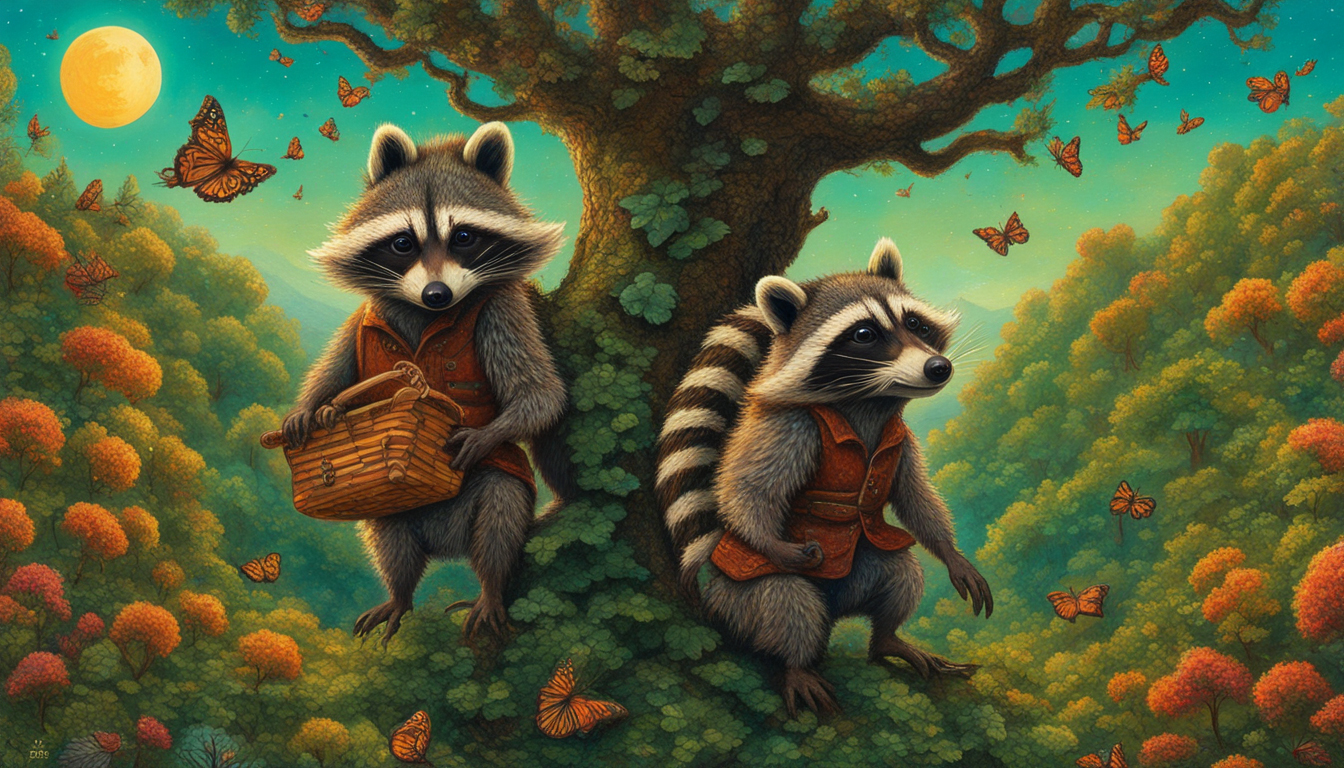

In [30]:
#% html
my $url ='https://i.imgur.com/dtNEeHU.png';
my $img = image-import($url, format => 'asis');
image-from-base64($img, width => 800)

Here we exemplify the use LLaMA "AI vision" capabilities:

In [31]:
llama-text-completion(
    "USER:[img-77]Describe the image.\nASSISTANT:",
    image-data => [{data => $img, id => 77},],
    temperature => 0.16,
    max-tokens => 200,
    format => 'values');

 The image features two cartoon raccoons sitting under a tree, each holding a basket. They are surrounded by various insects flying around them, creating an atmosphere of activity and liveliness. There is also a butterfly in the scene, adding to the lively nature of the environment.

The setting appears to be outdoors with trees and plants surrounding the raccoons, making it a serene and peaceful location for these animals. The presence of insects and butterflies suggests that this is a habitat where different species coexist harmoniously.

**Remark:** The AI vision seems to be a "hit or miss" -- approximately 50% the explanations have no relation to the given image.

-------

## Command Line Interface

### Playground access

The package provides a Command Line Interface (CLI) script:


In [32]:
#% bash
llama-playground --help

Usage:
  llama-playground [<words> ...] [--path=<Str>] [--mt|--max-tokens[=Int]] [-m|--model=<Str>] [-r|--role=<Str>] [-t|--temperature[=Real]] [--response-format=<Str>] [-a|--auth-key=<Str>] [--timeout[=UInt]] [-f|--format=<Str>] [--method=<Str>] [--base-url=<Str>] -- Command given as a sequence of words.
  
    --path=<Str>               Path, one of ''completions', 'chat/completions', 'embeddings', or 'models'. [default: 'chat/completions']
    --mt|--max-tokens[=Int]    The maximum number of tokens to generate in the completion. [default: 2048]
    -m|--model=<Str>           Model. [default: 'Whatever']
    -r|--role=<Str>            Role. [default: 'user']
    -t|--temperature[=Real]    Temperature. [default: 0.7]
    --response-format=<Str>    The format in which the response is returned. [default: 'url']
    -a|--auth-key=<Str>        Authorization key (to use LLaMA server Web API.) [default: 'Whatever']
    --timeout[=UInt]           Timeout. [default: 10]
    -f|--format=<Str>


**Remark:** When the authorization key, `auth-key`, is specified to be `Whatever`
then it is assigned the string `sk-no-key-required`.
If an authorization key is required then the env variable `LLAMA_API_KEY` can be also used.

--------

## Mermaid diagram

The following flowchart corresponds to the steps in the package function `llama-playground`:


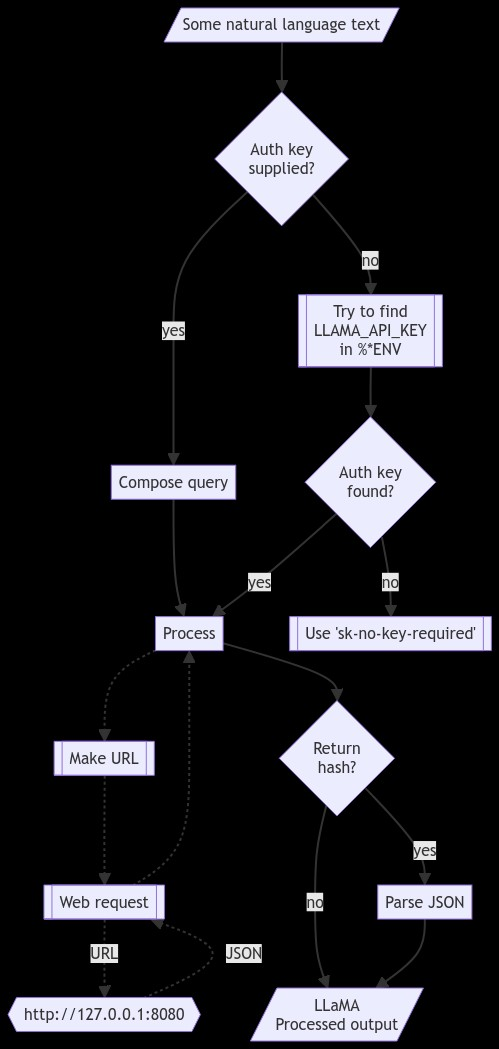

In [33]:
#% mermaid
graph TD
	UI[/Some natural language text/]
	TO[/"LLaMA<br/>Processed output"/]
	WR[[Web request]]
	LLaMA{{http://127.0.0.1:8080}}
	PJ[Parse JSON]
	Q{Return<br>hash?}
	MSTC[Compose query]
	MURL[[Make URL]]
	TTC[Process]
	QAK{Auth key<br>supplied?}
	EAK[["Try to find<br>LLAMA_API_KEY<br>in %*ENV"]]
	QEAF{Auth key<br>found?}
	NAK[["Use 'sk-no-key-required'"]]
	UI --> QAK
	QAK --> |yes|MSTC
	QAK --> |no|EAK
	EAK --> QEAF
	MSTC --> TTC
	QEAF --> |no|NAK
	QEAF --> |yes|TTC
	TTC -.-> MURL -.-> WR -.-> TTC
	WR -.-> |URL|LLaMA 
	LLaMA -.-> |JSON|WR
	TTC --> Q 
	Q --> |yes|PJ
	Q --> |no|TO
	PJ --> TO


--------

## References

### Packages

[AAp1] Anton Antonov,
[WWW::OpenAI Raku package](https://github.com/antononcube/Raku-WWW-OpenAI),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp2] Anton Antonov,
[WWW::MistralAI Raku package](https://github.com/antononcube/Raku-WWW-MistralAI),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp3] Anton Antonov,
[LLM::Functions Raku package](https://github.com/antononcube/Raku-LLM-Functions),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp4] Anton Antonov,
[LLM::Prompts Raku package](https://github.com/antononcube/Raku-LLM-Prompts),
(2023-2024),
[GitHub/antononcube](https://github.com/antononcube).

[AAp5] Anton Antonov,
[Jupyter::Chatbook Raku package](https://github.com/antononcube/Raku-Jupyter-Chatbook),
(2023),
[GitHub/antononcube](https://github.com/antononcube).

[MO1] Mozilla Ocho, [llamafile](https://github.com/mozilla-Ocho/llamafile).

[MO2] Mozilla Ocho, [llamafile documentation](https://github.com/Mozilla-Ocho/llamafile/blob/main/README.md).